In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("D:\datasets\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#dropping customer id
df = df.drop(["CustomerID"], axis=1)

In [8]:
#checking for null values
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
#checking for duplicate row
df.duplicated().sum()

0

In [10]:
#descriptive analysis
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [11]:
numerical_features = [feature for feature in df.columns if df[feature].dtype not in ['o', 'object']]
numerical_features

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [12]:
categorical_features = [feature for feature in df.columns if df[feature].dtype in ['o', 'object']]
categorical_features

['Gender']

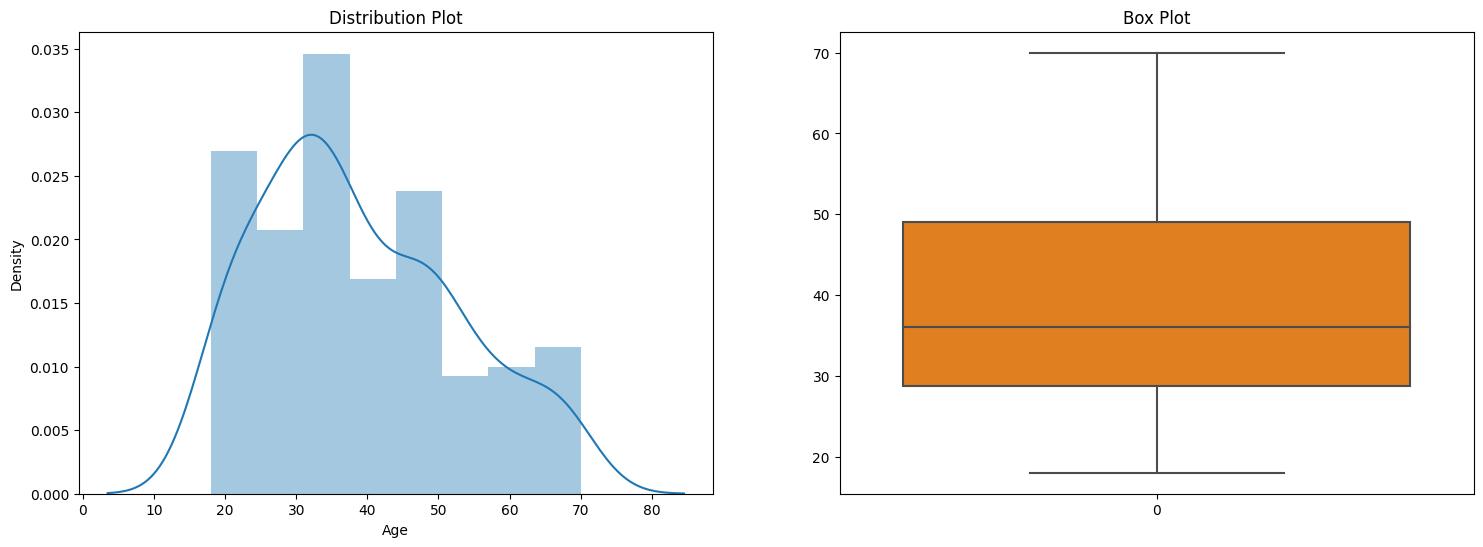

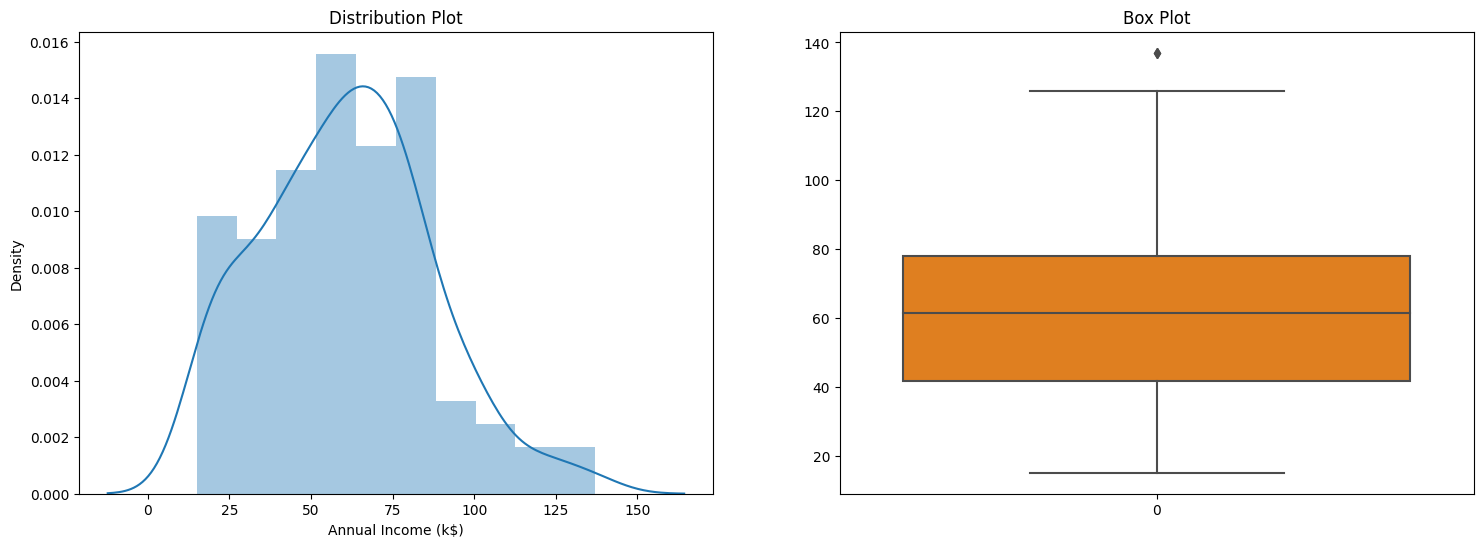

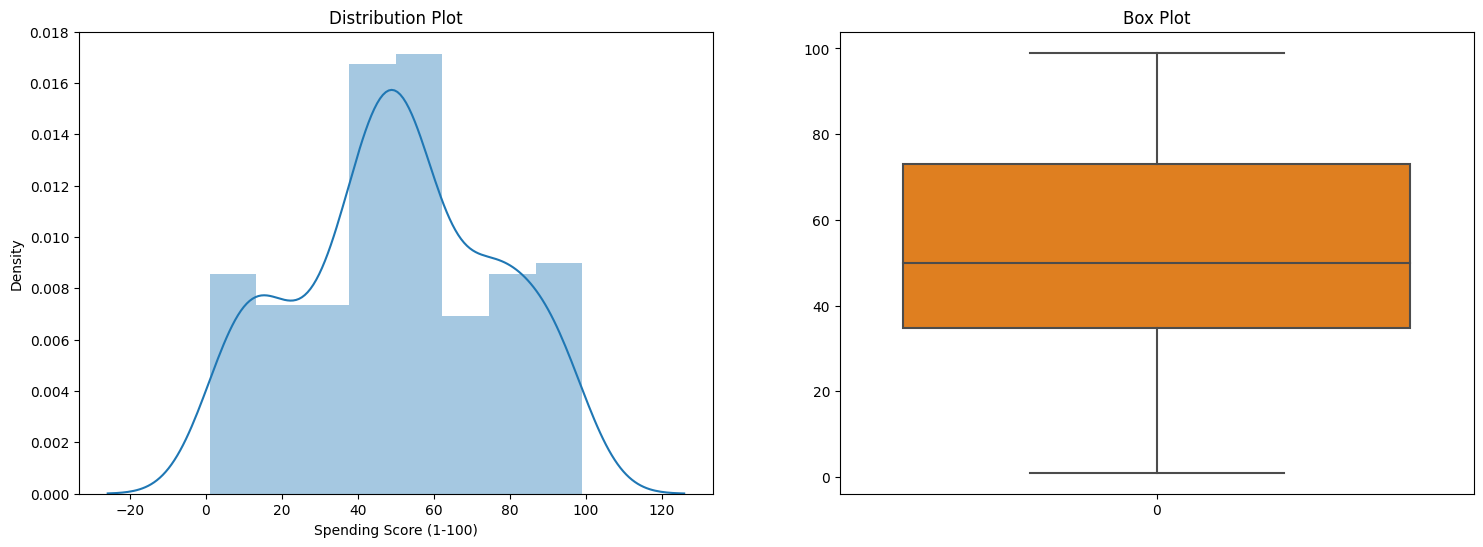

In [13]:
#Data visualization
#numerical data
for feature in numerical_features:
    plt.figure(figsize=(18,6))
    
    plt.subplot(1,2,1)
    plt.title("Distribution Plot")
    sns.distplot(df[feature])
    
    plt.subplot(1,2,2)
    plt.title("Box Plot")
    sns.boxplot(df[feature], palette="Set1_r")
    
    plt.show()

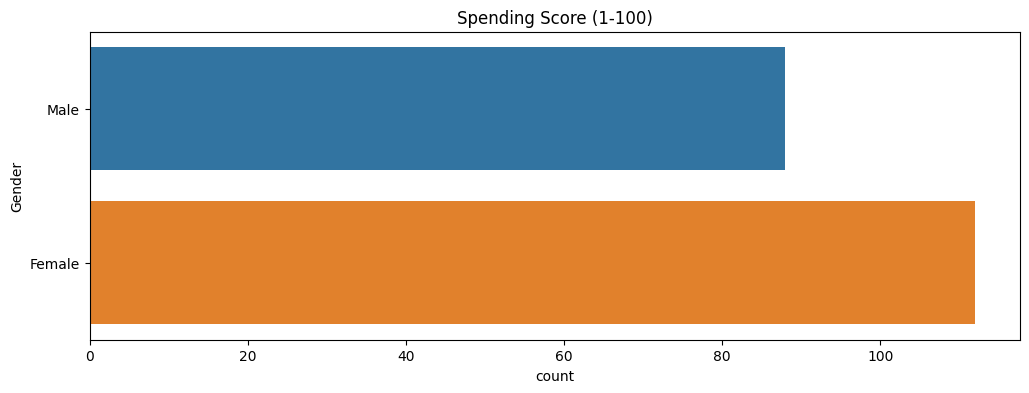

In [14]:
#categorical data
plt.figure(figsize=(12,4))
sns.countplot(data=df, y=df["Gender"])
plt.title(feature)
plt.show()

In [15]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [16]:
#grouping the data with respect to gender
df.groupby("Gender").agg(["count", "max", "min", "mean"])

Age                    Annual Income (k$)                      \
       count max min       mean              count  max min       mean   
Gender                                                                   
Female   112  68  18  38.098214                112  126  16  59.250000   
Male      88  70  18  39.806818                 88  137  15  62.227273   

       Spending Score (1-100)                     
                        count max min       mean  
Gender                                            
Female                    112  99   5  51.526786  
Male                       88  97   1  48.511364

<Axes: xlabel='Gender'>

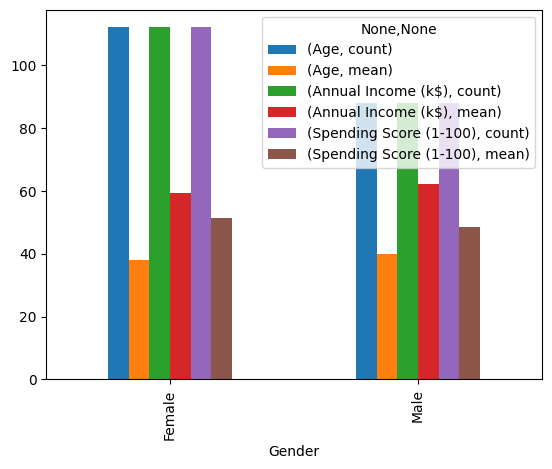

In [17]:
df.groupby("Gender").agg(["count","mean"]).plot(kind='bar')

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

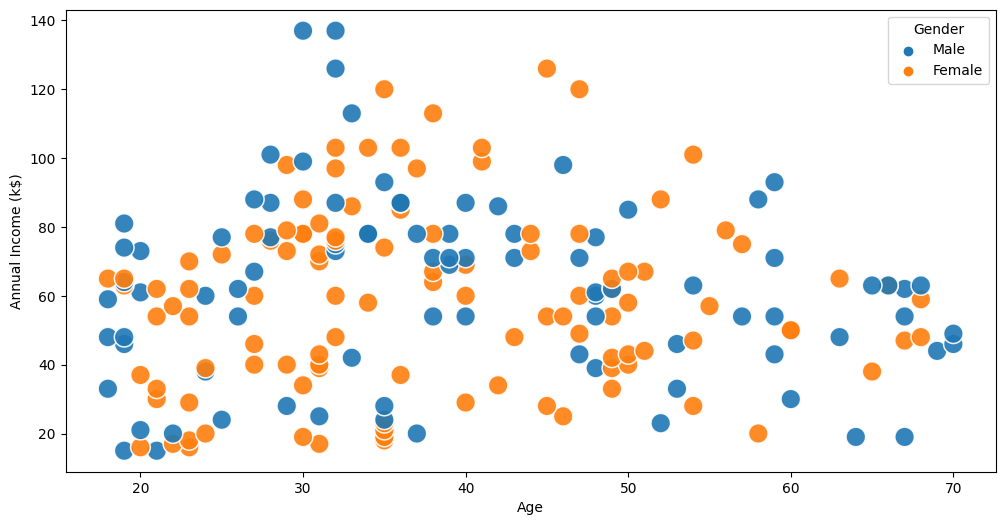

In [18]:
#seeing the relationship between each features with other
plt.figure(figsize=(12,6))
sns.scatterplot(data = df, x="Age", y="Annual Income (k$)", hue="Gender", s = 200 , alpha = 0.9)

In [19]:
#finding the variance between features
var = df.var()
var

Age                       195.133166
Annual Income (k$)        689.835578
Spending Score (1-100)    666.854271
dtype: float64

In [20]:
#finding the correlation between features
cor = df.corr()
cor

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


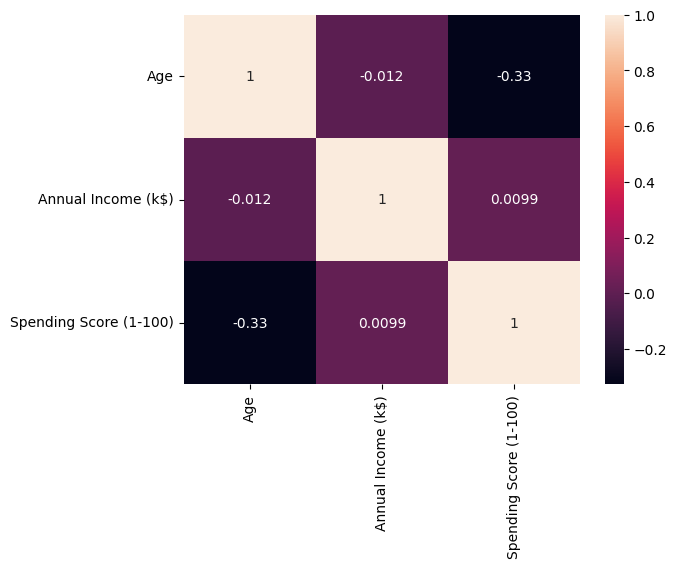

In [21]:
# PLoting heat map to visualize correlation 
sns.heatmap(cor, annot=True)
plt.show()

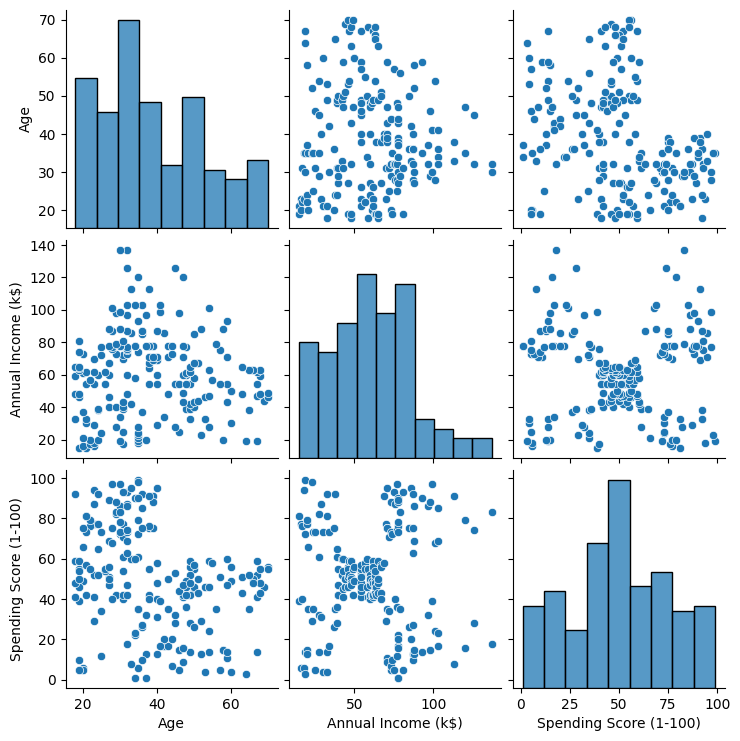

In [22]:
sns.pairplot(df)
plt.show()

In [23]:
#one hot encoding
new_df = pd.get_dummies(df)
new_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [40]:
#model building
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(new_df)


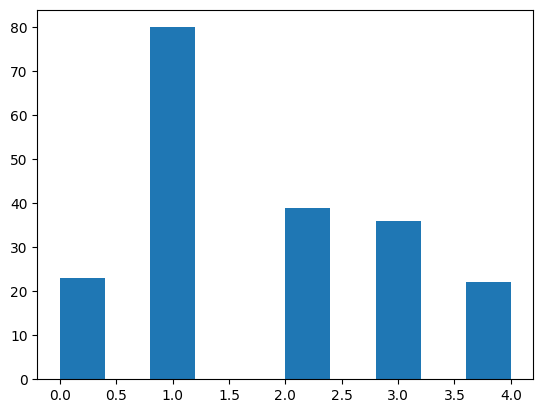

In [41]:
import matplotlib.pyplot as plt
plt.hist(labels)
plt.show()

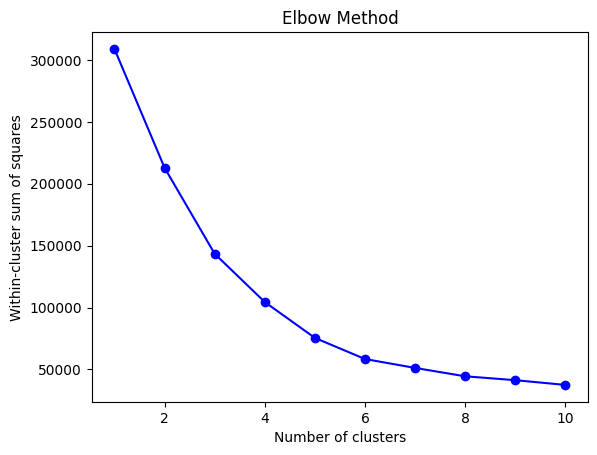

In [42]:
#applying elbow method and finding the optimal number clusters for the given dataset
ws = []                 #within cluster sum of squares for different values of k(ws)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(new_df)
    ws.append(kmeans.inertia_)

# Plot the within-cluster sum of squares
plt.plot(range(1, 11), ws, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow Method')
plt.show()

In [43]:
#building a kmeans model with 6 cluster
clustring_model = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
clustring_model.fit(new_df)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [44]:
labels = clustring_model.predict(new_df)
labels

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 2, 5, 2, 0,
       4, 5, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 1, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

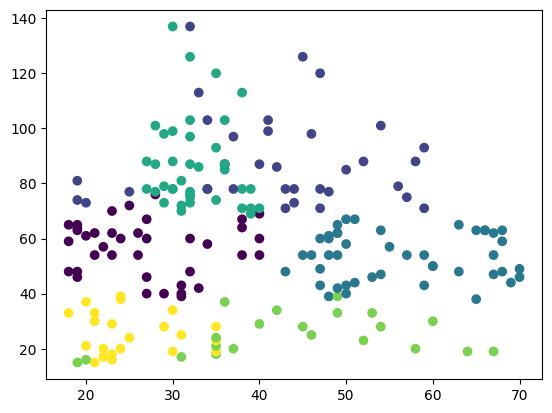

In [45]:
plt.scatter(new_df.values[:, 0], new_df.values[:, 1], c=labels)